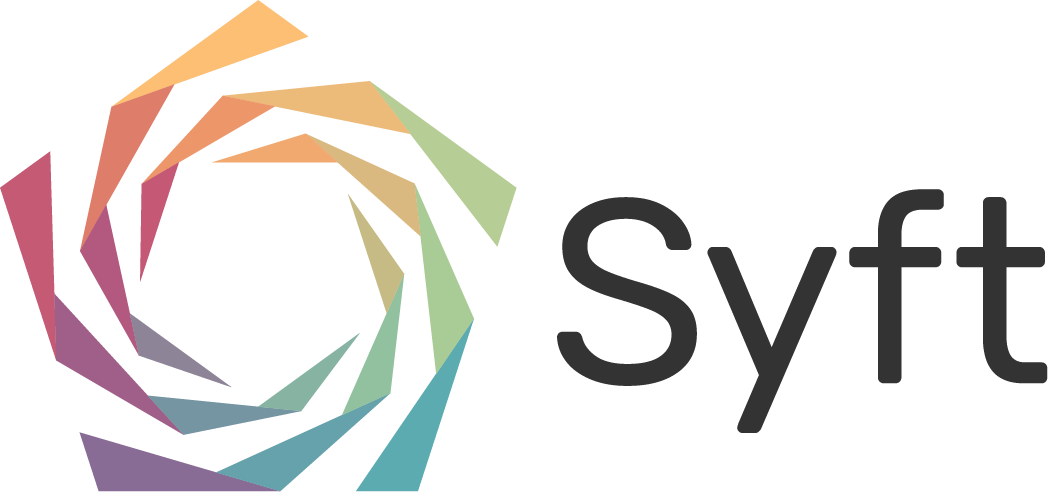

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://localhost:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.join_duet(loopback=True)

♫♫♫ > Connecting...

♫♫♫ > CONNECTED!



In [1]:
import syft as sy
duet = sy.launch_duet(network_url="http://localhost:5000", loopback=True)

In [2]:
import asyncio
async def wait_until(condition_func, timeout=3):
    i = 0
    cond = condition_func(duet)
    while not cond:
        await asyncio.sleep(1)
        i += 1
        if i>=timeout: 
            raise Exception(f"condition not statisfied in {timeout} second")
        cond = condition_func(duet)

# duet.store.pandas

In [3]:
import torch

In [4]:
torch.rand((1,3)).send(duet, tags=["tag1"], description="some description", pointable=True)
torch.rand((1,3)).send(duet, tags=["tag2"], description="some description", pointable=True)
torch.rand((1,3)).send(duet, tags=["tag3", "tag4"], description="some description", pointable=True);

In [5]:
await wait_until(lambda duet: len(duet.store)==3)
duet.store.pandas

ID          Tags       Description  \
0  <UID: bd59aee9a15047eab014d13ebf2d7041>        [tag1]  some description   
1  <UID: a7dca7003ea748cc9101b8495cfc2e34>        [tag2]  some description   
2  <UID: d6ba1b93705242c485d5f3cf7099b33d>  [tag3, tag4]  some description   

              object_type  
0  <class 'torch.Tensor'>  
1  <class 'torch.Tensor'>  
2  <class 'torch.Tensor'>

# request

In [6]:
await wait_until(lambda duet: len(duet.requests.requests)==3)
duet.requests.pandas

Requested Object's tags       Reason  \
0                  [tag1]  some reason   
1                  [tag2]  some reason   
2            [tag3, tag4]  some reason   

                                Request ID  \
0  <UID: adb237101c244d28bfbd5bed92e48b7b>   
1  <UID: 8dad9b71efcf4f04b1538292f73dd648>   
2  <UID: b6d1638394b24439a57459600eaab48f>   

                     Requested Object's ID Requested Object's type  
0  <UID: bd59aee9a15047eab014d13ebf2d7041>  <class 'torch.Tensor'>  
1  <UID: a7dca7003ea748cc9101b8495cfc2e34>  <class 'torch.Tensor'>  
2  <UID: d6ba1b93705242c485d5f3cf7099b33d>  <class 'torch.Tensor'>

# test add_handler

In [7]:
duet.requests.add_handler(action="accept", tags=["tag1"])

await wait_until(lambda duet: len(duet.requests.requests)==2)
duet.requests.pandas

Requested Object's tags       Reason  \
0                  [tag2]  some reason   
1            [tag3, tag4]  some reason   

                                Request ID  \
0  <UID: 8dad9b71efcf4f04b1538292f73dd648>   
1  <UID: b6d1638394b24439a57459600eaab48f>   

                     Requested Object's ID Requested Object's type  
0  <UID: a7dca7003ea748cc9101b8495cfc2e34>  <class 'torch.Tensor'>  
1  <UID: d6ba1b93705242c485d5f3cf7099b33d>  <class 'torch.Tensor'>

In [8]:
duet.requests.add_handler(action="deny", tags=["tag2"])

await wait_until(lambda duet: len(duet.requests.requests)==1)
duet.requests.pandas

Requested Object's tags       Reason  \
0            [tag3, tag4]  some reason   

                                Request ID  \
0  <UID: b6d1638394b24439a57459600eaab48f>   

                     Requested Object's ID Requested Object's type  
0  <UID: d6ba1b93705242c485d5f3cf7099b33d>  <class 'torch.Tensor'>

In [9]:
duet.requests.add_handler(action="accept", tags=["tag3", "tag4"])

await wait_until(lambda duet: len(duet.requests.requests)==0)

# remove_handler, clear_handlers

In [10]:
await wait_until(lambda duet: len(duet.requests.handlers.handlers)==3)
duet.requests.handlers.pandas

tags                                       ID  action  \
0        [tag1]  <UID: 67c839fe5b424568a82ae5056297bf38>  accept   
1        [tag2]  <UID: 63cbedd4df17481698bb9d50d969081e>    deny   
2  [tag3, tag4]  <UID: d1db5e74dea8463eb3720d2ecb42c49e>  accept   

   remaining time (s):  
0                   -1  
1                   -1  
2                   -1

In [11]:
duet.requests.remove_handler("tag1")
await wait_until(lambda duet: len(duet.requests.handlers.handlers)==2)
duet.requests.handlers.pandas

tags                                       ID  action  \
0        [tag2]  <UID: 63cbedd4df17481698bb9d50d969081e>    deny   
1  [tag3, tag4]  <UID: d1db5e74dea8463eb3720d2ecb42c49e>  accept   

   remaining time (s):  
0                   -1  
1                   -1

In [12]:
id_str = duet.requests.handlers[0]["id"].value.__str__().replace("-","")
duet.requests.remove_handler(id_str)
await wait_until(lambda duet: len(duet.requests.handlers.handlers)==1)
duet.requests.handlers.pandas

tags                                       ID  action  \
0  [tag3, tag4]  <UID: d1db5e74dea8463eb3720d2ecb42c49e>  accept   

   remaining time (s):  
0                   -1

In [13]:
duet.requests.clear_handlers()
await wait_until(lambda duet: len(duet.requests.handlers.handlers)==0)
duet.requests.handlers.pandas

Empty DataFrame
Columns: []
Index: []

# handler timeout

In [14]:
duet.requests.add_handler(action="accept", tags=["tag1"], timeout_secs=5)
duet.requests.handlers.pandas

tags                                       ID  action  \
0  [tag1]  <UID: fc320c0c89974fa78c053a87841e0a9d>  accept   

   remaining time (s):  
0                    4

In [15]:
await wait_until(lambda duet: len(duet.requests.handlers.handlers)==0, 6)
duet.requests.handlers.pandas

Empty DataFrame
Columns: []
Index: []

# iteration

In [16]:
# this says: 
#     Accept requests to results of `__len__()` called on objects whose tags is ["tag_x"]
duet.requests.add_handler(action="accept", tags=["tag_x", "__len__"])
await wait_until(lambda duet: len(duet.requests.handlers.handlers)==1)
duet.requests.handlers.pandas

tags                                       ID  action  \
0  [tag_x, __len__]  <UID: ddd10c8db33147269516c1a325e8b7ef>  accept   

   remaining time (s):  
0                   -1

In [17]:
sy.lib.python.List([1,2,3]).send(duet, pointable=True, tags=["tag_x"])
duet.store.pandas

ID          Tags       Description  \
0  <UID: bd59aee9a15047eab014d13ebf2d7041>        [tag1]  some description   
1  <UID: a7dca7003ea748cc9101b8495cfc2e34>        [tag2]  some description   
2  <UID: d6ba1b93705242c485d5f3cf7099b33d>  [tag3, tag4]  some description   
3  <UID: 6b4adde121ab437987d1d0b9da8ca8b5>       [tag_x]                     

                           object_type  
0               <class 'torch.Tensor'>  
1               <class 'torch.Tensor'>  
2               <class 'torch.Tensor'>  
3  <class 'syft.lib.python.list.List'>